# Bounded confidence model with networkx graph with all same weights

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Defining the parameters
We first define some parameters such as the number of agents n, the number of connections per agent m, the probability of rewiring a connection p, the number of time steps tmax, and the confidence threshold alpha.

In [3]:
# Graph Parameters
n = 1000 # number of agents
m = 4 # number of connections per agent
p = 0.1 # probability of rewiring a connection
tmax = 10000 # number of time steps

# Bounded confidence model parameters
epsilon = 0.5 # Tolerance to differing opinions
mew = 0.2 # Adjustment rate

# Generating Graph
We then generate an initial graph using the watts_strogatz_graph function from NetworkX and assign random initial opinions to each agent.

In [4]:
G = nx.watts_strogatz_graph(n, m, p)

# Assign initial opinions

In [5]:
opinions = np.random.rand(n)


# Simulation Loop
The simulation loop randomly selects an agent at each time step and checks whether its opinion is within the confidence threshold of the average opinion of its neighbors. If so, the agent updates its opinion to the average.

In [6]:
for t in range(tmax):
    # Select a random agent
    agent_i = np.random.randint(n)
    
    # Get opinion of agent
    opinion = opinions[agent_i]
    
    # Get opinions of neighbors
    neighbors = list(G.neighbors(agent_i))
    
    # Test if any neighbors are within tolerance and update opinions
    for agent_j in neighbors:
        if abs(opinions[agent_i] - opinions[agent_j]) < epsilon:
            new_opinion_i = opinions[agent_i] - mew * (opinions[agent_i] - opinions[agent_j])
            new_opinion_j = opinions[agent_j] + mew * (opinions[agent_i] - opinions[agent_j])
            opinions[agent_i] = new_opinion_i
            opinions[agent_j] = new_opinion_j

# Plots

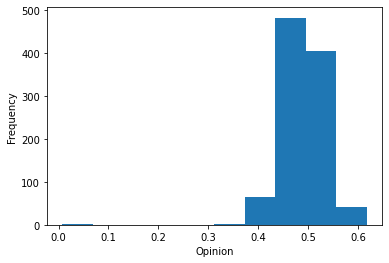

In [7]:
plt.hist(opinions)
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.show()